In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson, nbinom
import seaborn as sns
import pandas as pd

from Model import Model
from PlaceInputs import PlaceInputs
from utils import *
import configs

# Parameters and Initialization

In [2]:
# Parameters
N_inp = 5000
N_bar = 5000
num_states = 100

In [3]:
place_inputs = PlaceInputs(N_inp, num_states).get_inputs()
model = Model(N_inp, N_bar, num_states, steps=200)

# Measuring place autocorrelation

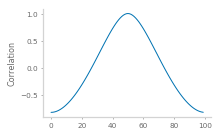

In [4]:
plt.figure(figsize=(3,2))
test_state = num_states//2
spatial_falloff = np.corrcoef(place_inputs)[test_state]
plt.plot(spatial_falloff)
plt.ylabel('Correlation')
plt.show()

# Example Activity (without learning)

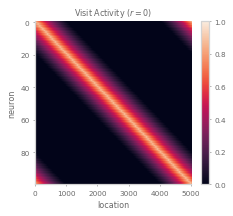

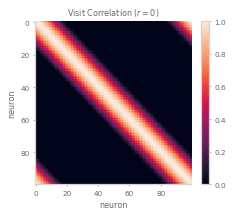

In [5]:
_, acts, _, acts_over_time = model.run_nonrecurrent(place_inputs)

plt.figure(figsize=(3.5,3))
plt.imshow(acts, vmin=0, vmax=1, aspect='auto')
plt.xlabel("location")
plt.ylabel("neuron")
plt.colorbar()
plt.title(f"Visit Activity ($r=0$)")
plt.show()

plt.figure(figsize=(3.5,3))
plt.imshow(np.corrcoef(acts), vmin=0, vmax=1, aspect='auto')
plt.xlabel("neuron")
plt.ylabel("neuron")
plt.colorbar()
plt.title(f"Visit Correlation ($r=0$)")
plt.show()

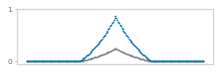

In [6]:
t = 99
n_pts = 200
sample_idxs = np.linspace(0, N_bar, n_pts, endpoint=False).astype(int)
fig, ax = plt.subplots(figsize=(3.5,1.))
plt.scatter(
    np.arange(n_pts),
    acts_over_time[0, num_states//2][sample_idxs],
    color='gray', s=0.5
    )
plt.scatter(
    np.arange(n_pts),
    acts_over_time[t, num_states//2][sample_idxs],
    color='C0', s=0.5
    )
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
#ax.get_yaxis().set_ticks([])
plt.yticks([0, 1])
plt.show()

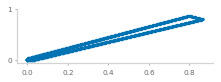

In [7]:
plt.figure(figsize=(3.5, 1.))
plt.scatter(
    acts_over_time[-1, num_states//2],
    acts_over_time[-1, num_states//2+1],
    alpha=.5, s=5
    )
plt.yticks([0, 1])
plt.show()

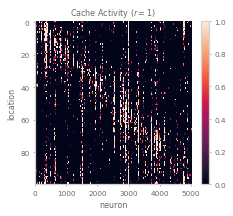

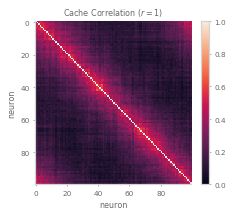

In [8]:
_, acts, _, acts_over_time = model.run_recurrent(place_inputs)

plt.figure(figsize=(3.5,3))
plt.imshow(acts, vmin=0, vmax=1, aspect='auto')
plt.xlabel("neuron")
plt.ylabel("location")
plt.colorbar()
plt.title(f"Cache Activity ($r=1$)")
plt.show()

plt.figure(figsize=(3.5,3))
plt.imshow(np.corrcoef(acts), vmin=0, vmax=1, aspect='auto')
plt.xlabel("neuron")
plt.ylabel("neuron")
plt.colorbar()
plt.title(f"Cache Correlation ($r=1$)")
plt.show()

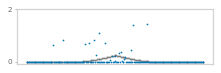

In [9]:
t = 99
n_pts = 200
sample_idxs = np.linspace(0, N_bar, n_pts, endpoint=False).astype(int)
fig, ax = plt.subplots(figsize=(3.5,1))
plt.scatter(
    np.arange(n_pts),
    acts_over_time[0, num_states//2][sample_idxs],
    color='gray', s=0.5
    )
plt.scatter(
    np.arange(n_pts),
    acts_over_time[t, num_states//2][sample_idxs],
    color='C0', s=0.5
    )
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
plt.yticks([0, 2])
plt.show()

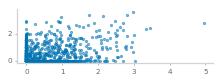

In [10]:
plt.figure(figsize=(3.5,1))
plt.scatter(
    acts_over_time[-1, num_states//2],
    acts_over_time[-1, num_states//2+1],
    alpha=.5, s=5
    )
plt.yticks([0, 2])
#plt.xlabel('State 1')
#plt.ylabel('State 2')
plt.show()

# Figure 1B

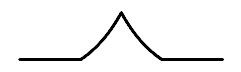

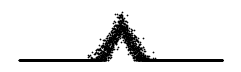

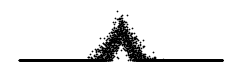

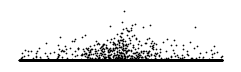

In [11]:
for t in [0, 1, 2, 99]:
    fig, ax = plt.subplots(figsize=(4,1))
    plt.scatter(
        np.arange(N_bar), acts_over_time[t, num_states//2],
        color='black', s=0.5
        )
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    plt.show()

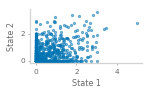

In [12]:
plt.figure(figsize=(2,1))
plt.scatter(
    acts_over_time[-1, num_states//2],
    acts_over_time[-1, num_states//2+1],
    alpha=.5, s=5
    )
plt.xlabel('State 1')
plt.ylabel('State 2')
plt.show()

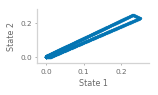

In [13]:
plt.figure(figsize=(2,1))
plt.scatter(
    acts_over_time[0, num_states//2],
    acts_over_time[0, num_states//2+1],
    alpha=.2, s=5
    )
plt.xlabel('State 1')
plt.ylabel('State 2')
plt.show()

# SFig 1

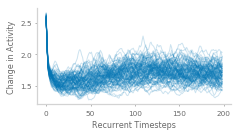

In [16]:
plt.figure(figsize=(3.5,2))
for s in range(100):
    diffs = []
    prev_act = acts_over_time[0, s]
    for t in range(1, 200):
        curr_act = acts_over_time[t, s]
        diffs.append(np.linalg.norm(curr_act - prev_act))
        prev_act = curr_act
    plt.plot(diffs, color='C0', alpha=0.2)
plt.xlabel('Recurrent Timesteps')
plt.ylabel('Change in Activity')
plt.tight_layout()
plt.savefig('figures/s2a.png', dpi=300)
plt.show()

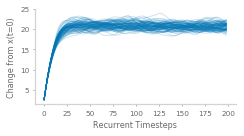

In [17]:
plt.figure(figsize=(3.5,2))
for s in range(100):
    diffs = []
    for t in range(1, 200):
        curr_act = acts_over_time[t, s]
        diffs.append(np.linalg.norm(curr_act - acts_over_time[0, s]))
        prev_act = curr_act
    plt.plot(diffs, color='C0', alpha=0.2)
plt.xlabel('Recurrent Timesteps')
plt.ylabel('Change from x(t=0)')
plt.tight_layout()
plt.savefig('figures/s2b.png', dpi=300)
plt.show()